# INTRODUCTION

DIVVY is a bike-sharing public system based in Chicago and Evanston. Customers can rent bikes from a Divvy station and pay per minute of use until the bike is returned to any of the 625 stations. The main problem the service faces is to determine the optimal supply/demand of bikes per station per hour. For the service to function efficiently, transport trucks need to reallocate the bikes between stations to ensure demand can be covered optimally throughout the city. In other to do this, we need to identify the traffic per station, to ensure enough bikes are available for customers to rent out and spots are free for clients to return the bikes. In this report, we aim to provide the optimal transportation service system and schedule, taking into account the company’s constraints and optimizing the number of transports.

# IMPORT DATA

In [5]:
from gurobipy import *

In [6]:
from datascience import *
import numpy as np
import geopy.distance
import calendar
import math as math
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('ggplot')

In [7]:
trips_Q3 = Table.read_table('Divvy_Trips_2017_Q3.csv')
trips_Q3

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
16734065,9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1985
16734064,9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1979
16734063,9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,Clark St & Lincoln Ave,144,Larrabee St & Webster Ave,Subscriber,Male,1993
16734062,9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Customer,nan,nan
16734061,9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Subscriber,Female,1994
16734060,9/30/2017 23:58:45,10/1/2017 00:16:37,6132,1072,478,Rockwell St & Eastwood Ave,117,Wilton Ave & Belmont Ave,Subscriber,Male,1980
16734059,9/30/2017 23:57:19,10/1/2017 00:05:36,5235,497,114,Sheffield Ave & Waveland Ave,296,Broadway & Belmont Ave,Subscriber,Male,1988
16734058,9/30/2017 23:57:12,10/1/2017 00:00:46,54,214,87,Racine Ave & Fullerton Ave,127,Lincoln Ave & Fullerton Ave,Subscriber,Male,1977
16734057,9/30/2017 23:56:59,10/1/2017 00:20:17,3823,1398,90,Millennium Park,86,Eckhart Park,Customer,nan,nan
16734056,9/30/2017 23:56:52,10/1/2017 00:14:44,5794,1072,296,Broadway & Belmont Ave,268,Lake Shore Dr & North Blvd,Subscriber,Female,1990


In [8]:
trips_Q4 = Table.read_table('Divvy_Trips_2017_Q4.csv')
trips_Q4

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
17536701,12/31/2017 23:58,1/1/2018 0:03,3304,284,159,Claremont Ave & Hirsch St,69,Damen Ave & Pierce Ave,Subscriber,Male,1988
17536700,12/31/2017 23:54,1/1/2018 0:18,5975,1402,145,Mies van der Rohe Way & Chestnut St,145,Mies van der Rohe Way & Chestnut St,Customer,nan,nan
17536699,12/31/2017 23:54,1/1/2018 0:18,4906,1441,145,Mies van der Rohe Way & Chestnut St,145,Mies van der Rohe Way & Chestnut St,Customer,nan,nan
17536698,12/31/2017 23:48,12/31/2017 23:53,5667,315,340,Clark St & Wrightwood Ave,143,Sedgwick St & Webster Ave,Subscriber,Male,1963
17536697,12/31/2017 23:42,12/31/2017 23:47,5353,272,240,Sheridan Rd & Irving Park Rd,245,Clarendon Ave & Junior Ter,Subscriber,Male,1977
17536696,12/31/2017 23:41,12/31/2017 23:51,5840,589,93,Sheffield Ave & Willow St,343,Racine Ave & Wrightwood Ave,Subscriber,Male,1988
17536695,12/31/2017 23:34,12/31/2017 23:39,6351,301,337,Clark St & Chicago Ave,182,Wells St & Elm St,Subscriber,Male,1990
17536694,12/31/2017 23:21,12/31/2017 23:23,2562,141,226,Racine Ave & Belmont Ave,117,Wilton Ave & Belmont Ave,Subscriber,Male,1987
17536693,12/31/2017 23:17,12/31/2017 23:27,2471,615,49,Dearborn St & Monroe St,26,McClurg Ct & Illinois St,Subscriber,Male,1981
17536692,12/31/2017 22:57,12/31/2017 23:09,6462,743,196,Cityfront Plaza Dr & Pioneer Ct,255,Indiana Ave & Roosevelt Rd,Subscriber,Male,1980


In [9]:
# combining the two datasets trips_Q3 and trips_Q4, selecting only relevant columns
trips = Table().with_columns('start_time', np.append(trips_Q3.column('start_time'), trips_Q4.column('start_time')),
                            'end_time', np.append(trips_Q3.column('end_time'), trips_Q4.column('end_time')),
                             'bikeid', np.append(trips_Q3.column('bikeid'), trips_Q4.column('bikeid')),
                             'tripduration', np.append(trips_Q3.column('tripduration'), trips_Q4.column('tripduration')),
                            'from_station_id', np.append(trips_Q3.column('from_station_id'), trips_Q4.column('from_station_id')),
                            'to_station_id', np.append(trips_Q3.column('to_station_id'), trips_Q4.column('to_station_id')))
trips

start_time,end_time,bikeid,tripduration,from_station_id,to_station_id
9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,259
9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,259
9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,144
9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,217
9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,217
9/30/2017 23:58:45,10/1/2017 00:16:37,6132,1072,478,117
9/30/2017 23:57:19,10/1/2017 00:05:36,5235,497,114,296
9/30/2017 23:57:12,10/1/2017 00:00:46,54,214,87,127
9/30/2017 23:56:59,10/1/2017 00:20:17,3823,1398,90,86
9/30/2017 23:56:52,10/1/2017 00:14:44,5794,1072,296,268


In [10]:
stations = Table.read_table('Divvy_Stations_2017_Q3Q4.csv')
stations

id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
2,Buckingham Fountain,Chicago,41.8764,-87.6203,27,6/10/2013 10:43,nan
3,Shedd Aquarium,Chicago,41.8672,-87.6154,55,6/10/2013 10:44,nan
4,Burnham Harbor,Chicago,41.8563,-87.6133,23,6/10/2013 10:46,nan
5,State St & Harrison St,Chicago,41.8741,-87.6277,23,6/10/2013 10:46,nan
6,Dusable Harbor,Chicago,41.885,-87.6128,39,6/10/2013 11:18,nan
7,Field Blvd & South Water St,Chicago,41.8863,-87.6175,19,6/19/2013 10:00,nan
9,Leavitt St & Archer Ave,Chicago,41.8288,-87.6806,19,6/21/2013 9:33,nan
11,Jeffery Blvd & 71st St,Chicago,41.7666,-87.5765,11,6/21/2013 9:39,nan
12,South Shore Dr & 71st St,Chicago,41.7664,-87.5657,15,6/21/2013 10:00,nan
13,Wilton Ave & Diversey Pkwy,Chicago,41.9324,-87.6527,27,6/22/2013 18:29,nan


# DATA PROCESSING AND EXPLORATION

## 1) Analyze the busiest origin and destination stations

### Busiest origin stations (from_station_id)

We decided to graph the top 10 busiest origin stations based on the number of trips that start at each bike station. The results, as shown in the graph, indicate that station 35 receives the most traffic by a significant proportion. This is important because managing bike relocation requires an understanding of which stations have the most bikes removed.

/Users/minhanhtrinh/opt/anaconda3/lib/python3.9/site-packages/datascience/tables.py:3647: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


id,count
35,60885
192,32806
76,31578
177,30603
268,30045
91,27403
77,25410
85,24546
195,22691
287,21773


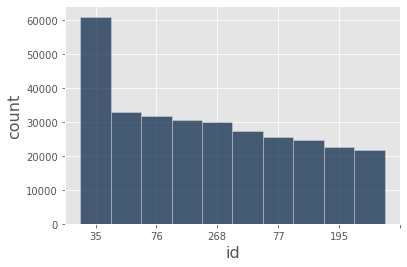

In [11]:
# origin_station_c returns the number of times a bike was taken out from a station
origin_station_id, origin_station_c = np.unique(trips.column('from_station_id'), 
                                                          return_counts=True)
busiest_origin_stations = Table().with_columns('id', origin_station_id,
                                            'count', origin_station_c)
busiest_origin_stations = busiest_origin_stations.sort('count', descending=True)
busiest_origin_stations.take(np.arange(10)).bar('id')
busiest_origin_stations.take(np.arange(10))

### Busiest destination stations (to_station_id)

To illustrate which stations have the most bikes returned, we graphed the top 10 busiest destination stations based on the number of trips that end at each station.  

id,count
35,66486
192,35257
268,33357
177,32252
76,29457
77,29329
85,26279
91,25691
90,23860
43,22341


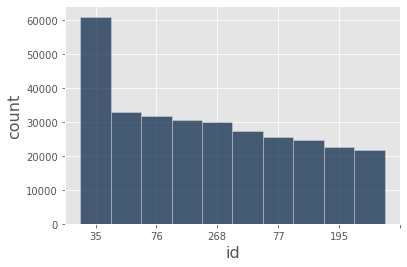

In [12]:
dest_station_id, dest_station_c = np.unique(trips.column('to_station_id'), 
                                                          return_counts=True)
busiest_dest_stations = Table().with_columns('id', dest_station_id,
                                            'count', dest_station_c)
busiest_dest_stations = busiest_dest_stations.sort('count', descending=True)
busiest_origin_stations.take(np.arange(10)).bar('id')
busiest_dest_stations.take(np.arange(10))

#### Insight:
The 10 busiest origin stations are 35, 192, 76, 177, 268, 91, 77, 85, 195, 287\
The 10 busiest destionation stations are 35, 192, 268, 177, 76, 77, 85, 91, 90, 43

## 2) Analyze the busiest days of the week

We decided to graph the percentage of traffic by day to better understand customer behavior and how the day of the week could affect bike placement schedules.  

In [13]:
date_array = ["" for i in range(trips.num_rows)]
# extracting the date portion from start_time variable
for i in np.arange(trips.num_rows):
    date_array[i] = trips.column('start_time')[i].split(' ')[0]
trips = trips.with_column('date', date_array)
trips
# the function findWeekday takes input a date and convert it into a weekday
def findWeekday(x):
    date = x.split(' ')[0]
    m,d,y = (int(i) for i in date.split('/'))   
    dayNumber = calendar.weekday(y,m,d)
    days =["Monday", "Tuesday", "Wednesday", "Thursday",
                         "Friday", "Saturday", "Sunday"]
    return (days[dayNumber])
trips = trips.with_column('day', trips.apply(findWeekday, 'start_time'))
trips

start_time,end_time,bikeid,tripduration,from_station_id,to_station_id,date,day
9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,259,9/30/2017,Saturday
9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,259,9/30/2017,Saturday
9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,144,9/30/2017,Saturday
9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,217,9/30/2017,Saturday
9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,217,9/30/2017,Saturday
9/30/2017 23:58:45,10/1/2017 00:16:37,6132,1072,478,117,9/30/2017,Saturday
9/30/2017 23:57:19,10/1/2017 00:05:36,5235,497,114,296,9/30/2017,Saturday
9/30/2017 23:57:12,10/1/2017 00:00:46,54,214,87,127,9/30/2017,Saturday
9/30/2017 23:56:59,10/1/2017 00:20:17,3823,1398,90,86,9/30/2017,Saturday
9/30/2017 23:56:52,10/1/2017 00:14:44,5794,1072,296,268,9/30/2017,Saturday


([<matplotlib.patches.Wedge at 0x7f9263b37790>,
 [Text(0.9894414528990799, 0.4806304310850054, 'Friday'),
  Text(0.2045556294337497, 1.0808131172718818, 'Monday'),
  Text(-0.7353947947586602, 0.8180430892329991, 'Saturday'),
  Text(-1.0999885273618832, -0.005023910054478631, 'Sunday'),
  Text(-0.7187168405866521, -0.8327341130619913, 'Thursday'),
  Text(0.22904363457634655, -1.0758898705072268, 'Tuesday'),
  Text(0.9928145270536883, -0.4736236004161546, 'Wednesday')],
 [Text(0.5396953379449526, 0.26216205331909387, '14.4%'),
  Text(0.11157579787295437, 0.5895344276028446, '15.3%'),
  Text(-0.4011244335047237, 0.4462053213998176, '14.0%'),
  Text(-0.5999937421973908, -0.002740314575170162, '12.8%'),
  Text(-0.3920273675927193, -0.45421860712472245, '14.4%'),
  Text(0.12493289158709811, -0.5868490202766691, '15.0%'),
  Text(0.541535196574739, -0.25834014568153885, '14.2%')])

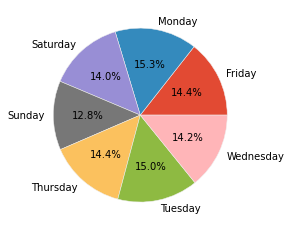

In [14]:
labels= ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
# counting the number of times a weekday appears in the dataset
start_date, counts = np.unique(trips.column('day'), return_counts=True)
weekday_table = Table().with_columns('date', start_date, 'count', counts)
plots.pie(weekday_table.column('count'), labels = labels, autopct='%1.1f%%')

#### Insight:
The traffic seems to spread evenly across all days of the week, although there is a little bit less traffic on the weekend

## 3) Analyze the busiest hours

The number of journeys each hour is an essential indicator of traffic patterns throughout the day, to investigate this the number of starting and ending trips each hour, the total number of trips were aggregated. The task of relocating bikes to meet demand is highly time dependent, and the graph of these results show clear patterns.  

In [15]:
start_hour_array = ["" for i in range(trips.num_rows)]
finish_hour_array = ["" for i in range(trips.num_rows)]
# extracting the date portion from start_time variable
for i in np.arange(trips.num_rows):
    # hours are formatted differently in each dataset
    if (len(trips.column('start_time')[i].split(' ')[1].split(':')[0]) > 1 and 
        trips.column('start_time')[i].split(' ')[1].split(':')[0][0] == '0'):
        start_hour_array[i] = trips.column('start_time')[i].split(' ')[1].split(':')[0][1]
    else: 
        start_hour_array[i] = trips.column('start_time')[i].split(' ')[1].split(':')[0]
    if (len(trips.column('end_time')[i].split(' ')[1].split(':')[0]) > 1 and 
        trips.column('end_time')[i].split(' ')[1].split(':')[0][0] == '0'):
        finish_hour_array[i] = trips.column('end_time')[i].split(' ')[1].split(':')[0][1]
    else: 
        finish_hour_array[i] = trips.column('end_time')[i].split(' ')[1].split(':')[0]
trips = trips.with_columns('start_hour', start_hour_array, 'finish_hour', finish_hour_array)
trips

start_time,end_time,bikeid,tripduration,from_station_id,to_station_id,date,day,start_hour,finish_hour
9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,259,9/30/2017,Saturday,23,0
9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,259,9/30/2017,Saturday,23,0
9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,144,9/30/2017,Saturday,23,0
9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,217,9/30/2017,Saturday,23,0
9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,217,9/30/2017,Saturday,23,0
9/30/2017 23:58:45,10/1/2017 00:16:37,6132,1072,478,117,9/30/2017,Saturday,23,0
9/30/2017 23:57:19,10/1/2017 00:05:36,5235,497,114,296,9/30/2017,Saturday,23,0
9/30/2017 23:57:12,10/1/2017 00:00:46,54,214,87,127,9/30/2017,Saturday,23,0
9/30/2017 23:56:59,10/1/2017 00:20:17,3823,1398,90,86,9/30/2017,Saturday,23,0
9/30/2017 23:56:52,10/1/2017 00:14:44,5794,1072,296,268,9/30/2017,Saturday,23,0


In [16]:
start_hour, start_hour_count = np.unique(trips.column('start_hour'), return_counts=True)
start_hour_stats = Table().with_columns('start_hour', start_hour, 'count', start_hour_count).sort('count', descending=True)
start_hour_stats

start_hour,count
17,266116
16,212425
18,185283
8,169488
15,151542
13,136228
14,136042
12,135230
7,130595
19,123316


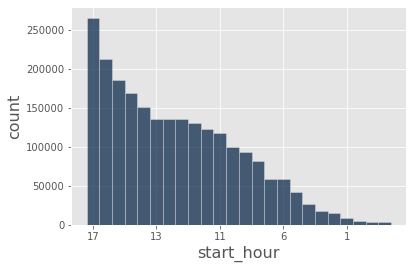

In [17]:
start_hour_stats.bar('start_hour')

In [18]:
finish_hour, finish_hour_count = np.unique(trips.column('finish_hour'), return_counts=True)
finish_hour_stats = Table().with_columns('finish_hour', finish_hour, 'count', finish_hour_count).sort('count', descending=True)
finish_hour_stats

finish_hour,count
17,269170
18,203110
16,198238
8,171195
15,148348
19,136928
13,135219
14,134281
12,132151
7,113516


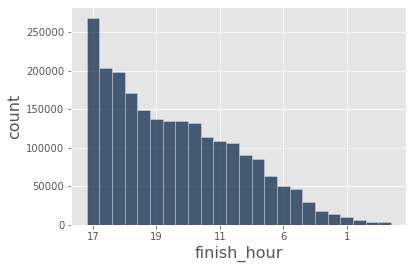

In [19]:
finish_hour_stats.bar('finish_hour')

#### Insight: 
The 5 busiest hours are: 17, 16, 18, 8, 15

## 4) Statistics of trip duration

Investigating the length of customer bike trips is important for predicting necessary bike supply and station capacity. To present our findings, we gathered summary statistics of the data, by collecting the mean, median, maximum and minimum journey times we are able to make important estimations.  

In [20]:
trip_duration = trips.column('tripduration')
trips_stats = Table().with_columns(' ', ['mean', 'median', 'max', 'min'], 
                                 'statistics', [np.mean(trip_duration), np.median(trip_duration ), np.max(trip_duration ), np.min(trip_duration )])
trips_stats

,statistics
mean,966.435
median,697
max,86014
min,60


#### Insight: 
There is a huge difference between the maximum trip duration and the minimum trip duration, ranging from 1 minute to almost 24 hours. The average trip duration is 16 minutes

# EXPLANATION OF THE PROBLEM

## What Are We Trying to Solve?

The model aims to find the optimal schedule and logistic system of repositing of bikes across Chicago and Evanston.

## What Are We Optimizing?

We are optimizing the transport services, and therefore minimizing the operational costs, for DIVVY. The model aims to minimize the number of transports between stations while still meeting customers’ demand. Due to limitations in out computational resources, we have narrowed our recommendation to the optimal schedule for the 5 busiest stations in the city. For the remaining stations we have determined that keeping them at a minimum of 20% of capacity should be enough to fulfill demand. It is important to note this is an assumption we are making to set the constraints of the model in terms of the available resources, not an optimal recommendation for the minimum capacity for stations.

## Assumptions and Limitations

For the transport costs and services, we are assuming the reposition services work 24h a day – 7 days a week, so the model isn’t limited to hours of service since bikes can be taken out and in at any time. Additionally, we are assuming they can adjust to any recommended schedule. In terms of expenses, we don’t have the fix or variable costs, so we have considered all repositioning actions have an equal cost despite the distance between stations, to focus on minimizing on the total number of transports. 
Regarding the data available, we have considered the total bikes’ ids in the Divvy_trips_2017 Q3 and Q4 datasets as the total bikes available in the company, to set a constraint for limited resources. Similarly, all stations in the divvy_stations_2017 dataset as the total number of stations the firm manages. Furthermore, since we are using the averages to find the number of bikes taken in and out of the station, we are assuming the historical trips data provided (Divvy_trips_2017_Q3 and Divvy_trips_2017_Q4) is normally distributed, an accurate representation of customer behavior and that there are no seasonality or intra-weekly variances, to establish an optimal schedule that applies everyday of the year.

# MODEL OVERVIEW

Outline of Parameters, Variables and Constraints

## Parameters
For the parameters of the model, we have defined the following four based on the capacity of stations, bikes available and points (stations) of transport:

- $C_{i}$ as the capacity of station $i$ 
- $D_{i,j}$ as the distance from station $i$ to station $j$
- $A$ as the total available bikes in Divvy, considering the amount reserved for the stations not considered in the study
- $U_{i,j,t}$ as the number of bikes transported from station $i$ to station $j$ by users in time period $t$

## Variables
Regarding the variables, we have defined the following: 
- $X_{i,j,t}$ as the decision of moving $X_{i,j,t}$ amount of bikes from station $i$ to the station $j$ in time period $t$
- $B_{i,t}$ as the amount of bikes at station $i$ in time period $t$
where\
$i \in I,$ $I$ is the set of 5 busiest stations \
$j \in J,$ $J$ is the set of 5 busiest stations  \
$t \in T$ = [morning, afternoon]

## Constraints
We have defined two types of constraints, compulsory and managerial. The first one being all mandatory constrains that account for the limited resources of the company, such as the bikes and stations. The second ones to consider the out-of-the-norm behaviour that can be exhibit by non-regular customers, who have no consistent behaviour that can be mapped out and included in the model. 
As mentioned before, we have analyzed the top 5 busiest origin and destination stations to provide an optimal capacity on two timeframes: morning and night. To achieve this, we have performed a count of the trips throughout both quarters on all the stations ids, sorted them on descending order and taking the top 5 ids.

### Compulsory constraints

1) The number of bikes across all stations at any time must not exceed the available number of bikes Divvy has,  $$\sum_{i\in I} B_{i,t} \le A $$ 
2) The number of bikes at a station should fit within the available capacity, $$B_{i,t} \le C_{i} $$ 
3) The number of bikes to be repositioned from station $i$ to station $j$ in time period $t$ must not be more than the number of bikes station $i$ currently has in time period $t$, $$B_{i,t} = B_{i,t-1} + \sum_{j\in J} X_{j,i,t} + \sum_{j\in J} U_{j,i,t} - \sum_{j\in J} X_{i,j,t} - \sum_{j\in J} U_{i,j,t}$$
4) $X_{i,j,t}$ and $B_{i,t}$ must be positive integers

### Business constraints
1) To account for unpredictable behavior, all stations at any given time should have at least the historical number of bikes picked up from that station in the next time period $t+1$  , $$B_{i,t} \ge \sum_{j\in J} U_{i,j,t+1}$$
2) To account for unpredictable behavior, all stations at time $t$ should have at most the difference between that station's capacity and the historical number of bikes dropped off at that station in the next time period $t+1$, $$B_{i,t} \le C_{i} - \sum_{j\in J} U_{j,i,t+1}$$

### Objective function

Our objective function is to minimize the cost of repositioning operation, which is to minimize the total number of trips of repositioning operation from all station $i$ to all station $j$ in all time period $t$. Therefore, we minimize $$\sum_{i \in I}\sum_{j\in J}\sum_{t \in T} X_{i,j,t}.D_{i,j}$$

# DATA EXTRACTION FOR THE PARAMETERS

In order to set the parameters, the following data extraction and definition has been performed.

### $C_{i}$ : the capacity of station $i$ 

In [21]:
C = busiest_origin_stations.take(np.arange(5)).join('id', stations, 'id').select('id', 'dpcapacity')
C

id,dpcapacity
35,47
76,39
177,23
192,47
268,39


### $D_{i,j}$: the distance from station $𝑖$ to station $𝑗$

In [22]:
busiest_stations_coords = busiest_origin_stations.take(np.arange(5)).join('id', stations, 'id').sort('count', descending = True).select('id', 'latitude', 'longitude')
D = Table().with_column('id', busiest_origin_stations.take(np.arange(5)).column('id'))
def find_distance(station):
    global D
    lat = busiest_stations_coords.where('id', station).column('latitude')[0]
    long = busiest_stations_coords.where('id', station).column('longitude')[0]
    this_station_coords = (lat, long)
    station_ids = busiest_stations_coords.column('id')
    station_distance = np.zeros(len(station_ids))
    for i in np.arange(len(station_ids)):
        other_station_coords = (busiest_stations_coords.where('id', station_ids[i]).column('latitude')[0],
                                busiest_stations_coords.where('id', station_ids[i]).column('longitude')[0])
        station_distance[i] = geopy.distance.geodesic(this_station_coords, other_station_coords).km
        D = D.with_column(str(station),station_distance)    
busiest_stations_coords.apply(find_distance, 'id')
D.show()

id,35,192,76,177,268
35,0,2.72757,1.31645,4.08549,2.48282
192,2.72757,0,1.93179,5.27674,3.76645
76,1.31645,1.93179,0,5.16765,3.51752
177,4.08549,5.27674,5.16765,0,1.65085
268,2.48282,3.76645,3.51752,1.65085,0


In [23]:
# statistics of the distance between stations
i = 1
k = 0
j = 1
all_dist = np.zeros(sum(np.arange(D.num_rows)))
for i in np.arange(i, D.num_rows):
    j = i
    for j in np.arange(j, D.num_rows):
        all_dist[k] = D[i][j] 
        k = k + 1
mean_dist = np.mean(all_dist)
all_dist
dist_summary = Table().with_columns(' ', ['mean', 'median', 'max', 'min'], 
                                 'stat', [np.mean(all_dist), np.median(all_dist), np.max(all_dist), np.min(all_dist)])
dist_summary

,stat
mean,3.19233
median,3.12254
max,5.27674
min,1.31645


### $U_{i,j,t}$: the number of bikes transported from station $i$ to all stations $j$ by users in time period $t$ (registered in the from_station_id variable)

In [24]:
busiest_origin_stations_traffic = Table().with_columns('id', busiest_origin_stations.take(np.arange(5)).column('id')).join('id', trips.select('from_station_id', 'start_time'), 'from_station_id')
date_array = ["" for i in range(busiest_origin_stations_traffic.num_rows)]
time_array = ["" for i in range(busiest_origin_stations_traffic.num_rows)]
for i in np.arange(busiest_origin_stations_traffic.num_rows):
    date_array[i] = busiest_origin_stations_traffic.column('start_time')[i].split(' ')[0]
    if (0 <= int(busiest_origin_stations_traffic.column('start_time')[i].split(' ')[1].split(':')[0]) <= 11):
        time_array[i] = 'morning'
    else:
        time_array[i] = 'night'
busiest_origin_stations_traffic = busiest_origin_stations_traffic.with_columns('date', date_array, 'time', time_array).group(['id','date', 'time'])
U_ijt = Table().with_column('time', ['morning', 'night'])
traffic_count = np.zeros(len(U_ijt.column('time')))
def avg_traffic(id):
    global U_ijt
    for i in np.arange(len(U_ijt.column('time'))):
        count = busiest_origin_stations_traffic.where('id', id).where('time', U_ijt[0][i]).column('count')
        traffic_count[i] = sum(count)/len(count)
    U_ijt = U_ijt.with_column(str(id), [traffic_count[0], traffic_count[1]])
for i in np.arange(busiest_origin_stations.take(np.arange(5)).num_rows):
    avg_traffic(busiest_origin_stations.take(np.arange(5)).column('id')[i])
U_ijt

time,35,192,76,177,268
morning,59.0339,94.5355,38.4512,35.1796,29.1193
night,275.607,84.2717,142.78,138.145,140.791


### $U_{j,i,t}$: the number of bikes transported to station $i$ from all stations $j$ by users in time period $t$ (registered in the to_station_id variable)

In [25]:
busiest_dest_stations_traffic = Table().with_columns('id', busiest_dest_stations.take(np.arange(5)).column('id')).join('id', trips.select('to_station_id', 'start_time'), 'to_station_id')
date_array = ["" for i in range(busiest_dest_stations_traffic.num_rows)]
time_array = ["" for i in range(busiest_dest_stations_traffic.num_rows)]
for i in np.arange(busiest_dest_stations_traffic.num_rows):
    date_array[i] = busiest_dest_stations_traffic.column('start_time')[i].split(' ')[0]
    if (0 <= int(busiest_dest_stations_traffic.column('start_time')[i].split(' ')[1].split(':')[0]) <= 11):
        time_array[i] = 'morning'
    else:
        time_array[i] = 'night'
busiest_dest_stations_traffic = busiest_dest_stations_traffic.with_columns('date', date_array, 'time', time_array).group(['id','date', 'time'])
busiest_dest_stations_traffic
U_jit = Table().with_column('time', ['morning', 'night'])
traffic_count = np.zeros(len(U_jit.column('time')))
def avg_traffic(id):
    global U_jit 
    for i in np.arange(len(U_jit .column('time'))):
        count = busiest_dest_stations_traffic.where('id', id).where('time', U_jit[0][i]).column('count')
        traffic_count[i] = sum(count)/len(count)
    U_jit = U_jit .with_column(str(id), [traffic_count[0], traffic_count[1]])
for i in np.arange(busiest_dest_stations.take(np.arange(5)).num_rows):
    avg_traffic(busiest_dest_stations.take(np.arange(5)).column('id')[i])
U_jit

time,35,192,268,177,76
morning,83.5495,50.2951,38.5439,46.3114,40.9497
night,280.219,142.366,152.08,137.742,130.375


### $A$: number of unique bikes

In [26]:
# A is the number of bikes available for each time period (morning & night, 12 hours each)
A = len(np.unique(trips.column('bikeid')))*12 

# Set the a fixed number of bikes for all the stations that are not included in the model (20%)
array = stations.column('dpcapacity')*12*0.2 

fixed_num_of_bikes = Table().with_columns('id', stations.column('id'),
                                             'fixed number of bikes', [int(x) for x in array])
five_busiest_stations = np.zeros(5)

# extracting the set number of bikes for 5 busiest stations
for i in np.arange(5):
    five_busiest_stations[i] = fixed_num_of_bikes.where('id', are.equal_to(busiest_origin_stations.take(np.arange(5)).column('id')[i])).column('fixed number of bikes')[0]

# A equals to the total amount of unique bikes minus the total number of bikes set for all stations 
# plus the fixed amount of bikes set for 5 busiest stations
A = A - sum(fixed_num_of_bikes.column('fixed number of bikes')) + sum(five_busiest_stations) 
A

49526.0

# RUNNING GUROBI MODEL OPTIMIZATION

Next, we will set the variables and constraints for the model based on the paramenters mentioned in the section above.

## Variables

In [27]:
# initialize the model
M = Model()

Restricted license - for non-production use only - expires 2023-10-25


In [28]:
# create a dictionary of variables
S = busiest_origin_stations.take(np.arange(5)).column('id')
T = ['morning', 'night']

B = {} # optimal number of bikes at a station 
X = {} # optimal number of bikes to be repositioned
B = M.addVars(S,T)
X = M.addVars([(i,j,t) for i in S for j in S if i!=j for t in T])

## Constraints

### Compulsory constraints

1) The number of bikes across all stations at any time must not exceed the available number of bikes Divvy has,  $$\sum_{i\in I} B_{i,t} \le A $$ 

In [29]:
M.addConstrs(quicksum(B[i,t] for i in S) <= A for t in T)

{'morning': <gurobi.Constr *Awaiting Model Update*>,
 'night': <gurobi.Constr *Awaiting Model Update*>}

2) The number of bikes at a station should fit within the available capacity, $$B_{i,t} \le C_{i} $$ 

In [30]:
for i in S:
    capacity = int(C.where('id', i).column('dpcapacity')[0])
    for t in T:
        M.addConstr(B[i,t] <= capacity*12)

3) The number of bikes to be repositioned from station $i$ to station $j$ in time period $t$ must not be more than the number of bikes station $i$ currently has in time period $t$, $$B_{i,t} = B_{i,t-1} + \sum_{j\in J} X_{j,i,t} + \sum_{j\in J} U_{j,i,t} - \sum_{j\in J} X_{i,j,t} - \sum_{j\in J} U_{i,j,t}$$

In [31]:
for t in T:
    if (t == "morning"):
        t_minusone = "night"
        for i in S:
            M.addConstr(B[i,t] == B[i,t_minusone] + quicksum(X[j,i,t] for j in S if i!=j) + U_jit.column(str(i))[0] - quicksum(X[i,j,t] for j in S if i!=j) - U_ijt.column(str(i))[0])
    else:
        t_minusone = "morning"
        for i in S:
            M.addConstr(B[i,t] == B[i,t_minusone] + quicksum(X[j,i,t] for j in S if i!=j) + U_jit.column(str(i))[1] - quicksum(X[i,j,t] for j in S if i!=j) - U_ijt.column(str(i))[1])


4) $X_{i,j,t}$ and $B_{i,t}$ must be positive integers\
In our business constraints below, we are setting the minimum number of bikes at a station ($B_{i,t}$) to be bigger or equal to the historical number of bikes picked up from that station, which obviously will be a positive number. Therefore, we only need to add the constraint that our decision variable $X_{i,j,t}$ is positive 

In [32]:
for i in S:
    for t in T:
        for j in S:
            if (i != j):
                M.addConstr(X[i,j,t] >= 0)

### Business constraints

1) To account for unpredictable behavior, all stations at any given time should have at least the historical number of bikes picked up from that station in the next time period $t+1$  , $$B_{i,t} \ge \sum_{j\in J} U_{i,j,t+1}$$

In [33]:
for i in S:
    for t in T:
        if (t == 'morning'):
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[1]) # if t is morning, t+1 will be night
        else:
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[0]) # if t is night, t+1 will be morning

2) To account for unpredictable behavior, all stations at time $t$ should have a maximum of slots available equal to the difference between that station's capacity and the historical number of bikes dropped off at that station in the next time period $t+1$, $$B_{i,t} \le C_{i} - \sum_{j\in J} U_{j,i,t+1}$$

In [34]:
for i in S:
    capacity = int(C.where('id', i).column('dpcapacity')[0])
    for t in T:
        if (t == 'morning'):
            M.addConstr(B[i,t] <= capacity*12 - U_jit.column(str(i))[1]) # if t is morning, t+1 will be night
        else:
            M.addConstr(B[i,t] <= capacity*12 - U_jit.column(str(i))[0]) # if t is night, t+1 will be morning

## Optimization

The model takes into account the previously mentioned constraints and parameters to provide an optimal capacity fulfilment and empty slots per timeframe (morning/night).
However, after running the model and relaxing the business assumptions, an optimal logistic scheme was unfeasible with the current (limited) resources and constraints. Please note we included an automatic flexibility of the assumptions for the model, as the current required constraints limit our ability to provide a schedule recommendation.

In [35]:
z = quicksum(X[j,i,t]*D.where("id", i).column(str(j))[0] for t in T for i in S for j in S if i!=j)
M.setObjective(z, GRB.MINIMIZE)

In [36]:
M.update()

In [37]:
print(M.display())

Minimize
<gurobi.LinExpr: 2.7275680340704915 C10 + 2.7275680340704915 C11
+ 1.3164477825107272 C12 + 1.3164477825107272 C13 + 4.085493818947044 C14
+ 4.085493818947044 C15 + 2.4828215756003513 C16 + 2.4828215756003513 C17
+ 2.7275680340704915 C18 + 2.7275680340704915 C19 + 1.9317872604973294 C20
+ 1.9317872604973294 C21 + 5.276744910651863 C22 + 5.276744910651863 C23
+ 3.766450417517531 C24 + 3.766450417517531 C25 + 1.3164477825107272 C26
+ 1.3164477825107272 C27 + 1.9317872604973294 C28 + 1.9317872604973294 C29
+ 5.167652997782674 C30 + 5.167652997782674 C31 + 3.5175197666111884 C32
+ 3.5175197666111884 C33 + 4.085493818947044 C34 + 4.085493818947044 C35
+ 5.276744910651863 C36 + 5.276744910651863 C37 + 5.167652997782674 C38
+ 5.167652997782674 C39 + 1.6508535620486084 C40 + 1.6508535620486084 C41
+ 2.4828215756003513 C42 + 2.4828215756003513 C43 + 3.766450417517531 C44
+ 3.766450417517531 C45 + 3.5175197666111884 C46 + 3.5175197666111884 C47
+ 1.6508535620486084 C48 + 1.6508535620486

In [38]:
M.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 82 rows, 50 columns and 180 nonzeros
Model fingerprint: 0xa8d96b70
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-01, 5e+04]
Presolve removed 72 rows and 5 columns
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model


In [40]:
# This function helps us detect the source of infeasibility in our model, 
# and it seems that our 3rd constraint is what causes the model to be infeasible
M.computeIIS() 
M.write("model.ilp")

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.216528e+03   0.000000e+00      0s

IIS computed: 10 constraints and 0 bounds
IIS runtime: 0.01 seconds (0.00 work units)


Since our model is infeasible, we decide to call the feasRelaxS() function on our model M, which modifies our model to create a feasibility relaxation, while minimizing the amount by which the solution violates the bounds and linear constraints of the original model.

In [41]:
M.feasRelaxS(0, False, True, True)
M.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 132 rows, 192 columns and 372 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-01, 5e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      38    6.4516508e+01   0.000000e+00   0.000000e+00      0s

Solved in 38 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.451650767e+01


In [42]:
print("Optimal value of the objective function is: ",M.objVal)

Optimal value of the objective function is:  64.51650767128933


In [43]:
for i in B:
    # rounding up the number of bikes because they have to be integers
    print("The number bikes at station", i, "is:", math.ceil(B[i].X)) 

The number bikes at station (35, 'morning') is: 276
The number bikes at station (35, 'night') is: 241
The number bikes at station (192, 'morning') is: 85
The number bikes at station (192, 'night') is: 129
The number bikes at station (76, 'morning') is: 143
The number bikes at station (76, 'night') is: 120
The number bikes at station (177, 'morning') is: 139
The number bikes at station (177, 'night') is: 138
The number bikes at station (268, 'morning') is: 141
The number bikes at station (268, 'night') is: 153



| Time    |35 |192|76 |177|268|
|:--------|---|---|---|---|---|
|Morning  |276|85|143|139|141|
|Night    |241|129 |120 |138 |153 |

In [44]:
for i in X:
    if (X[i].X != 0):
        # rounding up the number of bikes because they have to be integers
        print("The number bikes of to be repositioned ", i, "is:", math.ceil(X[i].X))

The number bikes of to be repositioned  (35, 76, 'night') is: 40
The number bikes of to be repositioned  (192, 76, 'night') is: 14
The number bikes of to be repositioned  (177, 35, 'morning') is: 11
The number bikes of to be repositioned  (268, 76, 'morning') is: 21


As we can see from the results above, this is the suggested logistic scheme of bikes to transport between the top 5 stations. The interpretation of the results is as follows:
Throughout the morning of any given day, the required number of bikes to be reposition from station 177 to station 35 is 11, the required number of bikes to be reposition from station 268 to station 76 is 21. Throughout the night of any given day, the required number of bikes to be reposition from station 35 to station 76 is 40, and the required number of bikes to be reposition from station 192 to station 76 is 14

## SENSITIVITY ANALYSIS

Regarding the sensitivity and managerial analysis of the model, we are proposing two scenarios to conduct further analysis in: the change in the time sections considered and change in the minimal number of transports with less bikes. We are focusing on variability in a resource the company can control (total number of bikes), and with further data on operational costs and revenue, how this insight might lead to a revaluation on the optimal number of bikes to manage.

#### 1) Changing the constraint for unlimited resources will showcase the absolute minimum transports. After setting the new constraints, we find that the number of transports doesn’t decrease, it actually remains stable even if we decrease the number of available bikes by ~600.

In [45]:
# sensitivity analysis for the constraints
M.printAttr(['Sense', 'Slack', 'Pi', 'RHS', 'SARHSLow', 'SARHSUp'])


  Constraint        Sense        Slack           Pi          RHS     SARHSLow      SARHSUp 
------------------------------------------------------------------------------------------
          R0            <      48744.4            0        49526      781.594          inf 
          R1            <      48747.7            0        49526      778.264          inf 
          R2            <      288.393            0          564      275.607          inf 
          R3            <      323.637            0          564      240.363          inf 
          R4            <      479.728            0          564      84.2717          inf 
          R5            <      435.488            0          564      128.512          inf 
          R6            <       325.22            0          468       142.78          inf 
          R7            <      348.432            0          468      119.568          inf 
          R8            <      137.855            0          276      138.145   

    CArtL_C6            >     -138.145            0            0         -inf      138.145 
    CArtL_C7            >     -137.742            0            0         -inf      137.742 
    CArtL_C8            >     -140.791            0            0         -inf      140.791 
    CArtL_C9            >      -152.08            0            0         -inf       152.08 
   CArtL_C10            >           -0            0            0         -inf            0 
   CArtL_C11            >           -0            0            0         -inf            0 
   CArtL_C12            >           -0            0            0         -inf            0 
   CArtL_C13            >     -39.8556            0            0         -inf      39.8556 
   CArtL_C14            >           -0            0            0         -inf            0 
   CArtL_C15            >           -0            0            0         -inf            0 
   CArtL_C16            >           -0            0            0         -inf   

#### Conclusion:
As we can see from the sensitivity analysis above (R0 & R1), our optimal solution will not change even if we increase the number of bikes infinitely. Since infitnite increase of bikes does not change the total number of transports, it isn’t worth it to explore an expansion in resources from a financial (profit optimization) perspective. However, if for some reasons, we have to decrease the number of bikes we have, the maximum amount of bikes can be decreased before the our optimal solution changes are 781 bikes for the morning time period, and 778 bikes for the night time period.

#### 2) To increase the precision of the logistic scheme, we conducted a sensitivity analysis to determine how to the optimal schedule changes by adding another time section (“afternoon”):

#### Re-running the model after adding another time section
Our time sections are as follows:\
Morning (from 5AM to 12PM)\
Afternoon (from 1PM to 8PM)\
Night (from 9PM to 4AM)

In [46]:
busiest_origin_stations_traffic = Table().with_columns('id', busiest_origin_stations.take(np.arange(5)).column('id')).join('id', trips.select('from_station_id', 'start_time'), 'from_station_id')
date_array = ["" for i in range(busiest_origin_stations_traffic.num_rows)]
time_array = ["" for i in range(busiest_origin_stations_traffic.num_rows)]
for i in np.arange(busiest_origin_stations_traffic.num_rows):
    date_array[i] = busiest_origin_stations_traffic.column('start_time')[i].split(' ')[0]
    t = int(busiest_origin_stations_traffic.column('start_time')[i].split(' ')[1].split(':')[0])
    if (5 <= t <= 12):
        time_array[i] = 'morning'
    elif (13 <= t <= 20):
        time_array[i] = 'afternoon'
    elif (t >= 21 or t <= 4):
        time_array[i] = 'night'
busiest_origin_stations_traffic = busiest_origin_stations_traffic.with_columns('date', date_array, 'time', time_array).group(['id','date', 'time'])
U_ijt = Table().with_column('time', ['morning', 'afternoon', 'night'])
traffic_count = np.zeros(len(U_ijt.column('time')))
def avg_traffic(id):
    global U_ijt
    for i in np.arange(len(U_ijt.column('time'))):
        count = busiest_origin_stations_traffic.where('id', id).where('time', U_ijt[0][i]).column('count')
        traffic_count[i] = sum(count)/len(count)
    U_ijt = U_ijt.with_column(str(id), [traffic_count[0], traffic_count[1], traffic_count[2]])
for i in np.arange(busiest_origin_stations.take(np.arange(5)).num_rows):
    avg_traffic(busiest_origin_stations.take(np.arange(5)).column('id')[i])
U_ijt

time,35,192,76,177,268
morning,85.9661,98.0275,54.8364,47.7143,40.4294
afternoon,229.322,77.8907,116.164,119.921,121.74
night,25.5379,4.2071,15.3828,8.73944,9.37762


In [47]:
busiest_dest_stations_traffic = Table().with_columns('id', busiest_dest_stations.take(np.arange(5)).column('id')).join('id', trips.select('to_station_id', 'start_time'), 'to_station_id')
date_array = ["" for i in range(busiest_dest_stations_traffic.num_rows)]
time_array = ["" for i in range(busiest_dest_stations_traffic.num_rows)]
for i in np.arange(busiest_dest_stations_traffic.num_rows):
    date_array[i] = busiest_dest_stations_traffic.column('start_time')[i].split(' ')[0]
    t = int(busiest_dest_stations_traffic.column('start_time')[i].split(' ')[1].split(':')[0])
    if (5 <= t <= 12):
        time_array[i] = 'morning'
    elif (13 <= t <= 20):
        time_array[i] = 'afternoon'
    elif (t >= 21 or t <= 4):
        time_array[i] = 'night'
busiest_dest_stations_traffic = busiest_dest_stations_traffic.with_columns('date', date_array, 'time', time_array).group(['id','date', 'time'])
busiest_dest_stations_traffic
U_jit = Table().with_column('time', ['morning', 'afternoon', 'night'])
traffic_count = np.zeros(len(U_jit.column('time')))
def avg_traffic(id):
    global U_jit 
    for i in np.arange(len(U_jit .column('time'))):
        count = busiest_dest_stations_traffic.where('id', id).where('time', U_jit[0][i]).column('count')
        traffic_count[i] = sum(count)/len(count)
    U_jit = U_jit .with_column(str(id), [traffic_count[0], traffic_count[1], traffic_count[2]])
for i in np.arange(busiest_dest_stations.take(np.arange(5)).num_rows):
    avg_traffic(busiest_dest_stations.take(np.arange(5)).column('id')[i])
U_jit

time,35,192,268,177,76
morning,117.764,53.5326,55.5,63.4438,55.3354
afternoon,236.066,135.665,129.074,115.655,109.017
night,16.0692,4.39264,8.86232,7.72993,10.8667


In [48]:
# A is the number of bikes available for each time period (8 hours each)
A = len(np.unique(trips.column('bikeid')))*8

# Set the a fixed number of bikes for all the stations that are not included in the model (20%)
array = stations.column('dpcapacity')*8*0.2 

fixed_num_of_bikes = Table().with_columns('id', stations.column('id'),
                                             'fixed number of bikes', [int(x) for x in array])
five_busiest_stations = np.zeros(5)
# extracting the set number of bikes for 5 busiest stations
for i in np.arange(5):
    five_busiest_stations[i] = fixed_num_of_bikes.where('id', are.equal_to(busiest_origin_stations.take(np.arange(5)).column('id')[i])).column('fixed number of bikes')[0]

# A equals to the total amount of unique bikes minus the total number of bikes set for all stations 
# plus the fixed amount of bikes set for 5 busiest stations
A = A - sum(fixed_num_of_bikes.column('fixed number of bikes')) + sum(five_busiest_stations) 
A

33084.0

In [49]:
S = busiest_origin_stations.take(np.arange(5)).column('id')
T = ['morning', 'afternoon','night']

B = {} # optimal number of bikes at a station 
X = {} # optimal number of bikes to be repositioned
B = M.addVars(S,T)
X = M.addVars([(i,j,t) for i in S for j in S if i!=j for t in T])

In [50]:
#1st constraint
M.addConstrs(quicksum(B[i,t] for i in S) <= A for t in T)
#3rd constraint
for t in T:
    if (t == "morning"):
        t_minusone = "night"
        for i in S:
            M.addConstr(B[i,t] == B[i,t_minusone] + quicksum(X[j,i,t] for j in S if i!=j) + U_jit.column(str(i))[0] - quicksum(X[i,j,t] for j in S if i!=j) - U_ijt.column(str(i))[0])
    elif (t == "afternoon"):
        t_minusone = "morning"
        for i in S:
            M.addConstr(B[i,t] == B[i,t_minusone] + quicksum(X[j,i,t] for j in S if i!=j) + U_jit.column(str(i))[1] - quicksum(X[i,j,t] for j in S if i!=j) - U_ijt.column(str(i))[1])
    elif (t == "night"):
        t_minusone = "afternoon"
        for i in S:
            M.addConstr(B[i,t] == B[i,t_minusone] + quicksum(X[j,i,t] for j in S if i!=j) + U_jit.column(str(i))[2] - quicksum(X[i,j,t] for j in S if i!=j) - U_ijt.column(str(i))[2])
#4th constraint
for i in S:
    for t in T:
        for j in S:
            if (i != j):
                M.addConstr(X[i,j,t] >= 0)
#5th constraint
for i in S:
    for t in T:
        if (t == 'morning'):
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[1]) #t+1
        elif (t == 'afternoon'):
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[2])
        elif (t == 'night'):
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[0])
#6th constraint
for i in S:
    capacity = int(C.where('id', i).column('dpcapacity')[0])
    for t in T:
        if (t == 'morning'):
            M.addConstr(B[i,t] <= capacity*8 - U_jit.column(str(i))[1]) #t+1
        elif (t == 'afternoon'):
            M.addConstr(B[i,t] <= capacity*8 - U_jit.column(str(i))[2])
        elif (t == 'night'):
            M.addConstr(B[i,t] >= U_ijt.column(str(i))[0])

In [51]:
z = quicksum(X[j,i,t]*D.where("id", i).column(str(j))[0] for t in T for i in S for j in S if i!=j)
M.setObjective(z, GRB.MINIMIZE)
M.update()
M.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 240 rows, 267 columns and 627 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 5e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.588782e+03   0.000000e+00      0s

Solved in 15 iterations and 0.00 seconds (0.00 work units)
Infeasible model


In [52]:
M.feasRelaxS(0, False, True, True)
M.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 457 rows, 749 columns and 1326 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-01, 5e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     210    2.0468198e+02   0.000000e+00   0.000000e+00      0s

Solved in 210 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.046819750e+02


In [53]:
print("Minimum value of the objective function is: ",M.objVal)

Minimum value of the objective function is:  204.68197503486695


In [54]:
for i in B:
    print("The number bikes at station", i, "is:", math.ceil(B[i].X))

The number bikes at station (35, 'morning') is: 230
The number bikes at station (35, 'afternoon') is: 237
The number bikes at station (35, 'night') is: 198
The number bikes at station (192, 'morning') is: 78
The number bikes at station (192, 'afternoon') is: 136
The number bikes at station (192, 'night') is: 187
The number bikes at station (76, 'morning') is: 117
The number bikes at station (76, 'afternoon') is: 110
The number bikes at station (76, 'night') is: 116
The number bikes at station (177, 'morning') is: 120
The number bikes at station (177, 'afternoon') is: 116
The number bikes at station (177, 'night') is: 105
The number bikes at station (268, 'morning') is: 122
The number bikes at station (268, 'afternoon') is: 130
The number bikes at station (268, 'night') is: 107


***
The optimal number of bikes at the 5 busiest stations in each time period is

| Time    |35 |192|76 |177|268|
|:--------|---|---|---|---|---|
|Morning  |230|78 |117|120|122|
|Afternoon|237|136|110 |116  |130 |
|Night    |198|187 |116 |105 |107 |

In [55]:
for i in X:
    if (X[i].X != 0):
        print("The number bikes of to be repositioned ", i, "is:", math.ceil(X[i].X))

The number bikes of to be repositioned  (35, 76, 'night') is: 30
The number bikes of to be repositioned  (76, 177, 'night') is: 18
The number bikes of to be repositioned  (177, 268, 'night') is: 29
The number bikes of to be repositioned  (268, 192, 'night') is: 51


#### Conlusion:
As we can see from results, the minimum value of the objective function increases by 317% when adding an additional time consideration. Eventhough the access to bikes in near stations is the most important part of customer satisfaction, the high percentage increase in our optimal function suggest it wouldn’t be worth it to add a new time section. However, no conclusion can be made without the financial breakdown of costs and the potential change in the cashflow projections to determine the profitability of adding a new time section.

# CONCLUSION

To summarize, this study aimed to provide an optimal logistic scheme for DIVVY’s transport services. This was achieved through an exploration of the data to determine the constraints and the selection of the decision variables explained above. After optimizing the relaxed version of the model, we found the optimal value for the number of bikes to be reposition from a given station. Furthermore, a sensitivity analysis was conducted to explore the changes in the number of transports when the constraint for the number of bikes was altered. Additional financial data is required to confirm the managerial recommendations, such as the cost of acquiring or manufacturing new bikes and the projected operational revenue, but according to our initial evaluation increasing the number of bikes available wouldn’t be practical for the company as there will be no change in the number of repositioning operations. Moreover, the huge increase in the value of objective function (317%) also doesn't justify the addition of a new time section.\
As next steps, we suggest increasing the computational resources to expand the study to all stations available, to create a general transport scheme. 